### Comparaison : Grille uniforme vs Échantillonnage aléatoire en 2D

On considère la fonction quadratique simple :

$$
f(x, y) = x^2 + y^2
$$

et l'objectif est de trouver son minimum sur le domaine carré :

$$
(x, y) \in [-1, 1]^2
$$

#### Méthodes de comparaison

1. **Grille uniforme (points réguliers)**  
   On crée une grille de points régulièrement espacés dans le carré $[-1, 1]^2$, puis on évalue $f(x, y)$ en chaque point. L'approche consiste à parcourir tous les points pour trouver le minimum.

2. **Échantillonnage aléatoire (points uniformes aléatoires)**  
   On génère un ensemble de points $(x_i, y_i)$ tirés uniformément dans le carré $[-1, 1]^2$ et on évalue $f(x_i, y_i)$. On compare les valeurs obtenues pour estimer le minimum.

$$
\text{Minimum trouvé par la grille uniforme : } \min_{(x, y) \in \text{grille}} f(x, y)
$$

$$
\text{Minimum estimé par échantillonnage aléatoire : } \min_{i} f(x_i, y_i)
$$

**Remarque :**  
- La grille uniforme est systématique et garantit de couvrir tout le domaine, mais peut devenir coûteuse en dimensions élevées (**malédiction de la dimensionnalité**).  
- L'échantillonnage aléatoire est plus flexible et rapide, mais peut manquer le vrai minimum si le nombre de points est trop faible.


Minimum Grille: (np.float64(-0.11111111111111116), np.float64(-0.11111111111111116), np.float64(0.02469135802469138))
Minimum Aléatoire: (np.float64(-0.017652562457886933), np.float64(-0.06212456528276755), np.float64(0.004171074572902446))


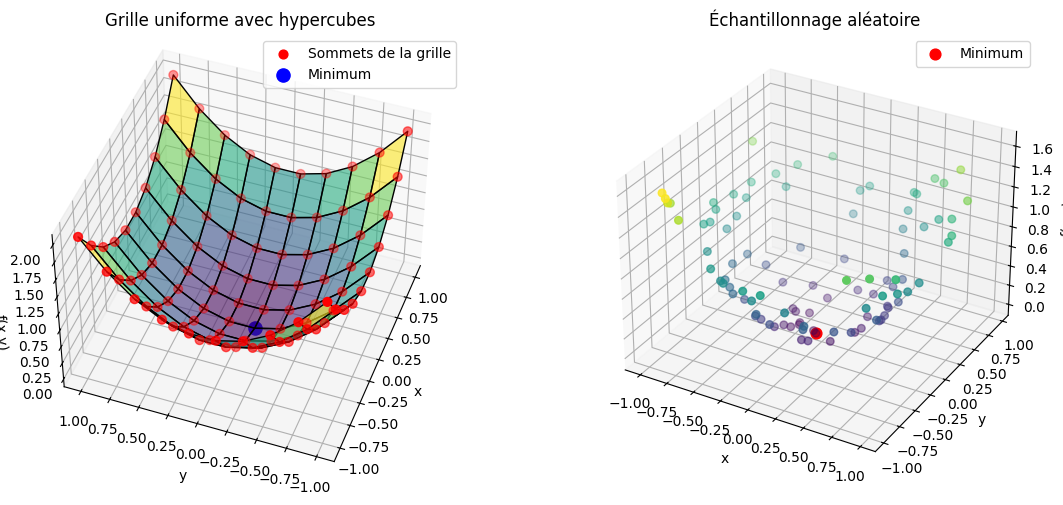

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fonction quadratique
def f(x, y):
    return x**2 + y**2

# Nombre de points
m = 10  # points par axe pour grille uniforme
n_random = 100  # points aléatoirement choisis

# Grille uniforme
x_grid = np.linspace(-1, 1, m)
y_grid = np.linspace(-1, 1, m)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
Z_grid = f(X_grid, Y_grid)

# Échantillonnage aléatoire
X_rand = np.random.uniform(-1, 1, n_random)
Y_rand = np.random.uniform(-1, 1, n_random)
Z_rand = f(X_rand, Y_rand)

# Trouver minimum
min_grid_idx = np.argmin(Z_grid)
min_grid = (X_grid.flatten()[min_grid_idx], Y_grid.flatten()[min_grid_idx], Z_grid.flatten()[min_grid_idx])

min_rand_idx = np.argmin(Z_rand)
min_rand = (X_rand[min_rand_idx], Y_rand[min_rand_idx], Z_rand[min_rand_idx])

print("Minimum Grille:", min_grid)
print("Minimum Aléatoire:", min_rand)

# --- Visualisation 3D ---
fig = plt.figure(figsize=(12, 5))

# Grille uniforme avec hypercubes visibles
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Surface atténuée
ax1.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='k', alpha=0.6)

# Créer un masque pour tous les points sauf le minimum
mask = np.ones(X_grid.size, dtype=bool)
mask[min_grid_idx] = False

# Points de la grille sauf le minimum
ax1.scatter(X_grid.flatten()[mask], Y_grid.flatten()[mask], Z_grid.flatten()[mask], color='red', s=40, label='Sommets de la grille')

# Minimum apparaît plus clair
ax1.scatter(min_grid[0], min_grid[1], min_grid[2], color='blue', s=90, label='Minimum')

ax1.set_title("Grille uniforme avec hypercubes")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x,y)")
ax1.legend()
ax1.view_init(elev=45, azim=200)

# Aléatoire
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X_rand, Y_rand, Z_rand, c=Z_rand, cmap='viridis', s=30)
ax2.scatter(min_rand[0], min_rand[1], min_rand[2], color='red', s=60, label='Minimum')
ax2.set_title("Échantillonnage aléatoire")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("f(x,y)")
ax2.legend()

plt.tight_layout()
plt.savefig("Comparaison_grille_vs_aleatoire.png")


plt.show()
